In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# 1. Function definition
The set of function that will be optimized in first place are:
$$
\begin{array}\\
    f_1 (x,y) = 4x^2+4y^2\\
    f_2 (x,y) = (x-5)^2+(y-5)^2
\end{array}
$$
subjected to the next set of constraints:
$$
\begin{array}\\
    g_1(x,y)=(x-5)^2+y^2\leq25 \\
    g_2(x,y)=(x-8)^2+(y+3)^2\geq7.7
\end{array}
$$
in the domain limited by
$$
\begin{array}\\
    0 \leq x \leq 5 \\
    0 \leq y \leq 3
\end{array}
$$

Text(0.5,1,'Function values for valid $x-y$ points')

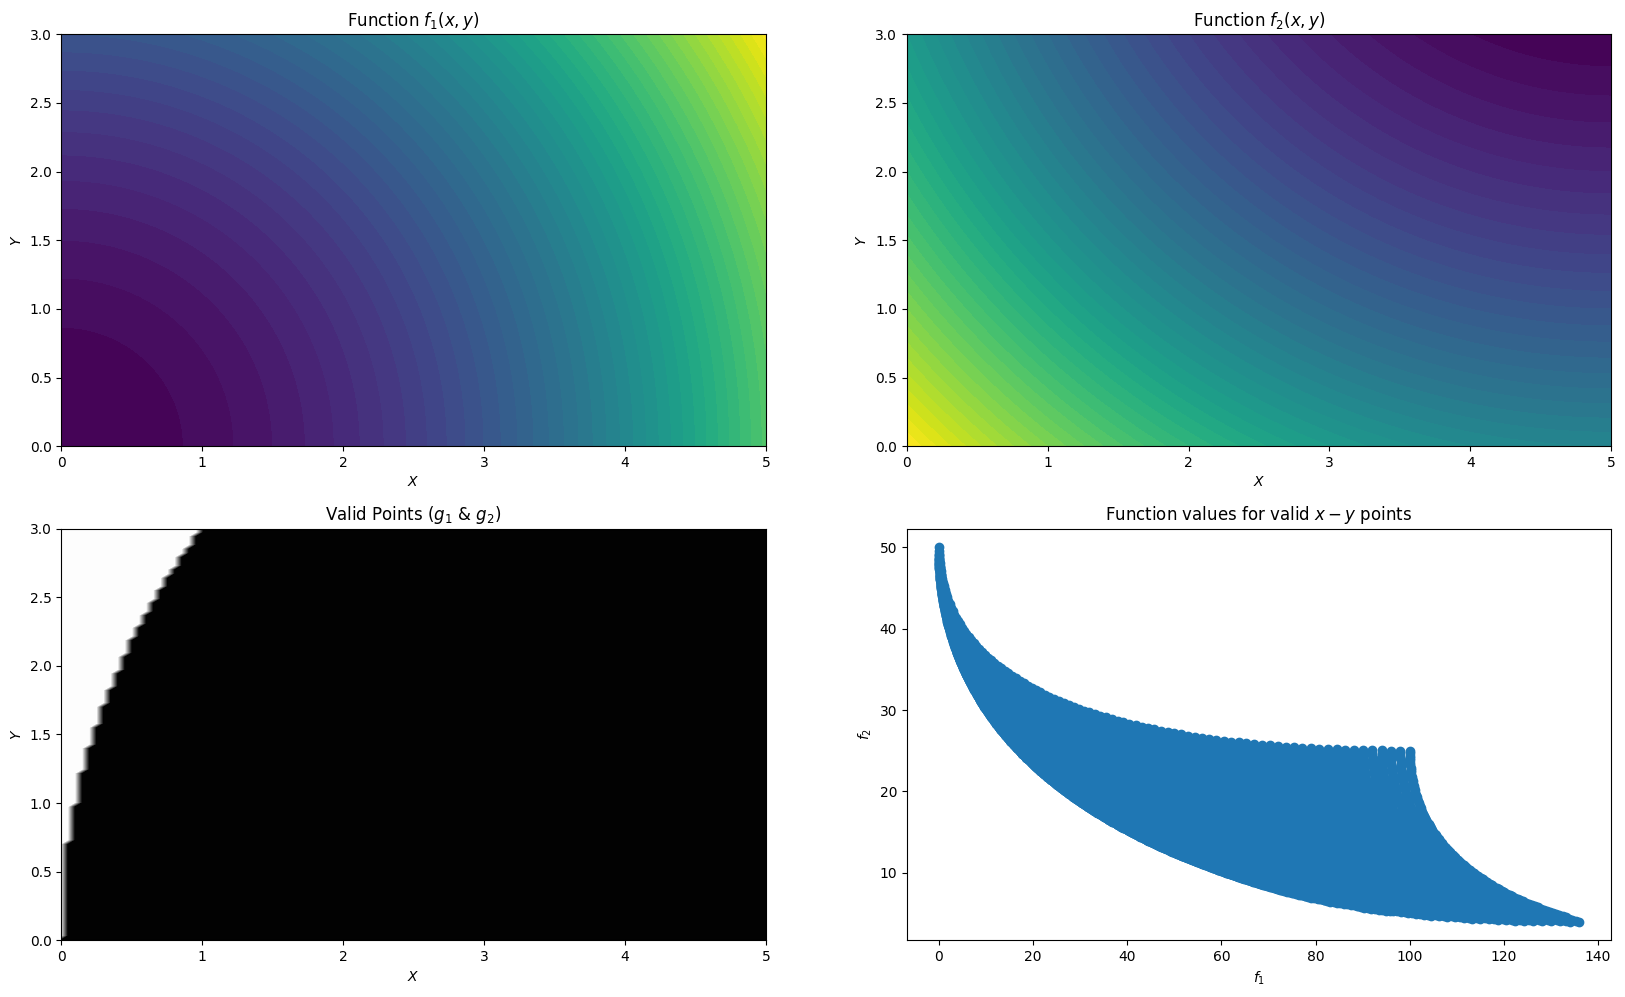

In [2]:
x = np.linspace(0,5,100)
y = np.linspace(0,3,100)
X, Y = np.meshgrid(x,y)
F1 = 4*X**2+4*Y**2
F2 = (X-5)**2+(Y-5)**2
G1 = (X-5)**2+Y**2
G1 = G1 < 25.0001
G2 = (X-8)**2+(Y+3)**2
G2 = G2 > 7.699999
G = np.logical_and(G1, G2)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,12), dpi= 100)
ax1.contourf(X,Y,F1,50)
ax1.set_xlim([0,5])
ax1.set_ylim([0,3])
ax1.set_xlabel(r'$X$')
ax1.set_ylabel(r'$Y$')
ax1.set_title(r'Function $f_1(x,y)$')
ax2.contourf(X,Y,F2,50)
ax2.set_xlim([0,5])
ax2.set_ylim([0,3])
ax2.set_xlabel(r'$X$')
ax2.set_ylabel(r'$Y$')
ax2.set_title(r'Function $f_2(x,y)$')
ax3.contourf(X,Y,G,50, cmap=cm.binary)
ax3.set_xlim([0,5])
ax3.set_ylim([0,3])
ax3.set_xlabel(r'$X$')
ax3.set_ylabel(r'$Y$')
ax3.set_title(r'Valid Points ($g_1$ & $g_2$)')
ax4.scatter(F1[G],F2[G])
ax4.set_xlabel(r'$f_1$')
ax4.set_ylabel(r'$f_2$')
ax4.set_title(r'Function values for valid $x-y$ points')

## 1.1 Optimization functions
The optimization functions will be minimized. All the optimization functions will be included in the same function, allowing the user to select (with Python notation) the function from which the results is wanted at each moment.

In [3]:
def fun(x,y,no):
    if no == 0:
        return 4*x**2+4*y**2
    if no == 1:
        return (x-5)**2+(y-5)**2

In [4]:
funNo = 2

## 1.2 Constraints
These will be defined as just one matrix, so it will allow further upgrading.

In [5]:
def const(x,y,no):
    #Let's use Python notation so the first equation will be no=0...
    if no == 0:
        return (x-5)**2+y**2
    if no == 1:
        return (x-8)**2+(y+3)**2

## 1.3 Comparison mode and values

In [6]:
constVal = [25, 7.7]
compMode = ['leq', 'geq']

## 1.4 Domain limits

In [7]:
x_low = 0
x_high = 5
y_low = 0
y_high = 3

# 2. Monte Carlo approach

In [8]:
#Number of used points
noPoints = 5000

#Get a random set of points
x = x_low+np.random.rand(noPoints)*(x_high-x_low)
y = y_low+np.random.rand(noPoints)*(y_high-y_low)

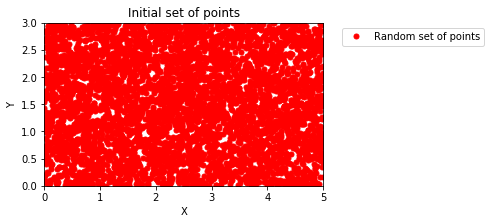

In [9]:
fig, ax1 = plt.subplots(1, figsize=(x_high-x_low, y_high-y_low))
ax1.plot(x,y,'.',c='r',markersize = 10, label='Random set of points')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim([x_low, x_high])
ax1.set_ylim([y_low, y_high])
ax1.set_title('Initial set of points')
ax1.legend(bbox_to_anchor=(1.05,1.0))

In [10]:
#Make a copy of the points X-Y to extract the valid ones
valid_x = np.copy(x)
valid_y = np.copy(y)
#Let's get the points that are valid under the constraints
for i in range(len(constVal)):
    if compMode[i] == 'leq':
        boolMat = np.logical_or(const(valid_x, valid_y, i) < constVal[i], const(valid_x, valid_y, i) == constVal[i])
    elif compMode[i] == 'less':
        boolMat = const(valid_x, valid_y, i) < constVal[i]
    elif compMode[i] == 'geq':
        boolMat = np.logical_or(const(valid_x, valid_y, i) > constVal[i], const(valid_x, valid_y, i) == constVal[i])
    elif compMode[i] == 'greater':
        boolMat = const(valid_x, valid_y, i) > constVal[i]
    elif compMode[i] == 'eq':
        boolMat = const(valid_x, valid_y, i) == constVal[i]
    else:
        print('Bad comparison mode matrix')
    valid_x = valid_x[boolMat] 
    valid_y = valid_y[boolMat]

In [11]:
if len(valid_x) != len(valid_y):
    print('Error in dimensions')

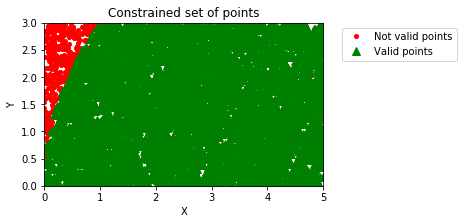

In [12]:
fig, ax1 = plt.subplots(1, figsize=(x_high-x_low, y_high-y_low))
ax1.plot(x,y,'.',c='r',markersize = 8, label='Not valid points')
ax1.plot(valid_x,valid_y,'^',c='g', markersize=8, label='Valid points')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim([x_low, x_high])
ax1.set_ylim([y_low, y_high])
ax1.set_title('Constrained set of points')
ax1.legend(bbox_to_anchor=(1.05,1.0))

In [13]:
#Evaluate the function for all points and for the valid ones
valid_values = np.zeros([len(valid_x), funNo])
all_values = np.zeros([len(x), funNo])

for i in range(funNo):
    valid_values[:,i] = fun(valid_x, valid_y, i)
    all_values[:,i] = fun(x, y, i)

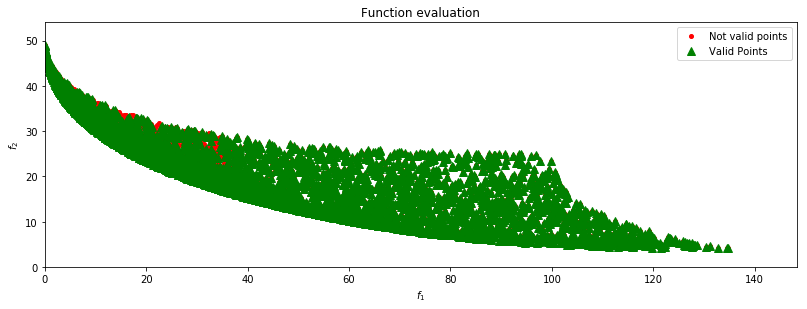

In [14]:
fig, ax1 = plt.subplots(1, figsize=((max(all_values[:,0])-min(all_values[:,0]))/10, (max(all_values[:,1])-min(all_values[:,1]))/10))
ax1.plot(all_values[:,0], all_values[:,1],'.',c='r',markersize = 8, label='Not valid points')
ax1.plot(valid_values[:,0], valid_values[:,1],'^',c='g', markersize=8, label='Valid Points')
ax1.set_xlabel('$f_1$')
ax1.set_ylabel('$f_2$')
ax1.set_xlim([0, 1.1*max(all_values[:,0])])
ax1.set_ylim([0, 1.1*max(all_values[:,1])])
ax1.set_title('Function evaluation')
ax1.legend()

Once the values have been computed, the Skyline operator will be included. In order to get the values that are not dominated by any of the other possible values, each point will divide the domain in 4 parts. If there is a point with a smaller X and Y (i.e. a more minimum value for both functions), the first point will be dominated and therefore it should not be in the Pareto front. A visual explanation is shown in the next cell before moving on to the function definition and usage for this set of points.

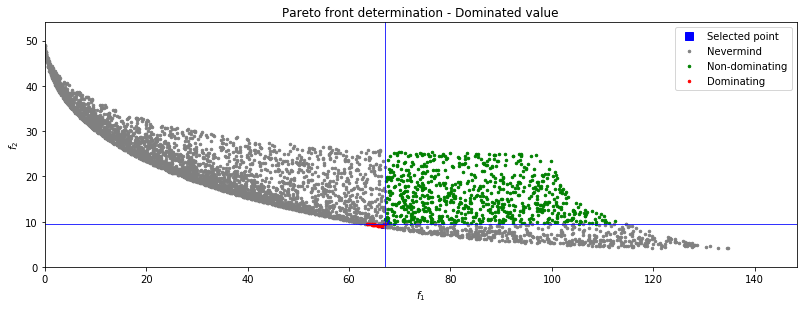

In [15]:
#Selection of a random point to make the example
pt = valid_values[np.random.randint(0,len(valid_values)),:]
#Creation of the 4 cuadrants arrays
ul = valid_values[np.logical_and(valid_values[:,0]<pt[0],valid_values[:,1]>pt[1])] #Upper left
ur = valid_values[np.logical_and(valid_values[:,0]>pt[0],valid_values[:,1]>pt[1])] #Upper right
ll = valid_values[np.logical_and(valid_values[:,0]<pt[0],valid_values[:,1]<pt[1])] #Lower left
lr = valid_values[np.logical_and(valid_values[:,0]>pt[0],valid_values[:,1]<pt[1])] #Lower right

fig, ax1 = plt.subplots(1, figsize=((max(all_values[:,0])-min(all_values[:,0]))/10, (max(all_values[:,1])-min(all_values[:,1]))/10))
ax1.plot(pt[0], pt[1],'s',c='b', markersize=8, label='Selected point')
ax1.plot(ul[:,0], ul[:,1],'.',c='gray', markersize=5, label='Nevermind')
ax1.plot(ur[:,0], ur[:,1],'.',c='g', markersize=5, label='Non-dominating')
ax1.plot(ll[:,0], ll[:,1],'.',c='r', markersize=5, label='Dominating')
ax1.plot(lr[:,0], lr[:,1],'.',c='gray', markersize=5)
ax1.plot([0, 1.1*max(all_values[:,0])], [pt[1], pt[1]], c='b', linewidth=0.8)
ax1.plot([pt[0], pt[0]], [0, 1.1*max(all_values[:,1])], c='b', linewidth=0.8)
ax1.set_xlabel('$f_1$')
ax1.set_ylabel('$f_2$')
ax1.set_xlim([0, 1.1*max(all_values[:,0])])
ax1.set_ylim([0, 1.1*max(all_values[:,1])])
if np.shape(ll)[0] == 0:
    ax1.set_title('Pareto front determination - Non-dominated value')
else:
    ax1.set_title('Pareto front determination - Dominated value')
ax1.legend();

In [16]:
def skyline(coordPts, ePts):
    #Ley's check if both coord(inated)P(oin)ts and e(valuated)P(oin)ts have the correct shape
    if ePts.shape[1] != 2 or ePts.shape[0] != coordPts.shape[0]:
        print('Non consistent input array')
        return
    else:
        paretoFront = np.zeros([valid_values.shape[0],4]) # x - y - f1 - f2
    #In case it has the correct shape, let's loop over it
    for i in range(ePts.shape[0]):
        pt = ePts[i,:]
        ll = ePts[np.logical_and(ePts[:,0]<pt[0],ePts[:,1]<pt[1])] #Lower left array
        if ll.shape[0] == 0: #non dominated value
            paretoFront[i,0:2] = pt[:]
            paretoFront[i,2:] = coordPts[i,:]
    #Remove the rows with zero values
    nonZeroValues = np.logical_and.reduce((paretoFront[:,0] != 0.0, paretoFront[:,1] != 0.0, paretoFront[:,2] != 0.0, paretoFront[:,3] != 0.0))
    #Return the non dominated values (i.e. Pareto Front)
    return paretoFront[nonZeroValues]

In [17]:
PF = skyline(np.array([valid_x, valid_y]).T, valid_values)

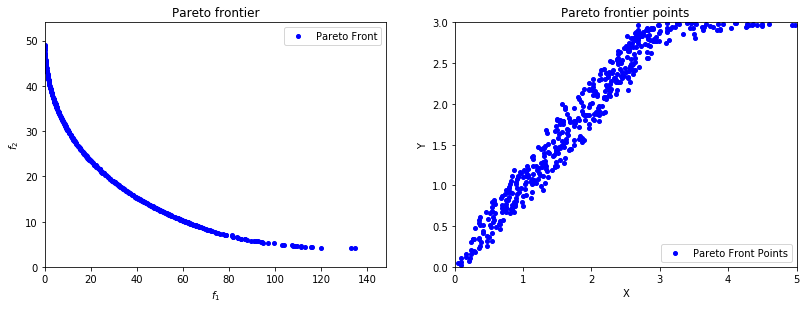

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((max(all_values[:,0])-min(all_values[:,0]))/10, (max(all_values[:,1])-min(all_values[:,1]))/10))
ax1.plot(PF[:,0], PF[:,1],'.',c='b', markersize=8, label='Pareto Front')
ax1.set_xlabel('$f_1$')
ax1.set_ylabel('$f_2$')
ax1.set_xlim([0, 1.1*max(all_values[:,0])])
ax1.set_ylim([0, 1.1*max(all_values[:,1])])
ax1.set_title('Pareto frontier')
ax1.legend()
ax2.plot(PF[:,2], PF[:,3],'.',c='b', markersize=8, label='Pareto Front Points')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_xlim([x_low, x_high])
ax2.set_ylim([y_low, y_high])
ax2.set_title('Pareto frontier points')
ax2.legend(loc='lower right')

# 3. Genetic algorithm approach
The limit of the genetic algorithm can't be an error limit or tolerance - given that the Pareto front doesn't have an empirical expression or something to relate the value to. Instead a limit in the number of generations will be used. Let's assume that with an infinite number of generations, the exact Pareto front will be exactly determined and defined with all its characteristics. In order to compare the results with the previous Monte Carlo approach with 500 points (i.e. 500 evaluations), the values used for the GA will try to have less evaluations that for MC.

## 3.1 Initial setup and GA configuration

In [19]:
#Number of used points
noGApoints = 50
#Number of the limit of generations
genLim = 10
#Domain limits are taken from the MC approach
#Get the generation matrix and the initial setup with random points as before
generation = np.zeros([genLim, noGApoints, 2])
generation[0,:,0] = x_low+np.random.rand(noGApoints)*(x_high-x_low)
generation[0,:,1] = y_low+np.random.rand(noGApoints)*(y_high-y_low)

In [20]:
#Preallocation of other neccessary arrays
paretoFront = np.zeros([genLim, noGApoints, funNo+2]) #Ideally a pareto front will have as many elements as points and the number of functions plus 2 coordinates
funEval = np.zeros([genLim, noGApoints, funNo])
fitness = np.zeros([genLim, noGApoints, 2]) #Simple probabilty and cummuative normalized probability

In [21]:
def constrainedPts(points, const, constVal, compMode):
    #Let's create a function that checks if any of the points is constrained and returns its boolean
    boolMat = np.zeros([len(constVal), points.shape[0]])
    #Let's get the points that are valid under the constraints
    for i in range(len(constVal)):
        if compMode[i] == 'leq':
            boolMat[i,:] = np.logical_or(const(points[:,0], points[:,1], i) < constVal[i], const(points[:,0], points[:,1], i) == constVal[i])
        elif compMode[i] == 'less':
            boolMat[i,:] = const(points[:,0], points[:,1], i) < constVal[i]
        elif compMode[i] == 'geq':
            boolMat[i,:] = np.logical_or(const(points[:,0], points[:,1], i) > constVal[i], const(points[:,0], points[:,1], i) == constVal[i])
        elif compMode[i] == 'greater':
            boolMat[i,:] = const(points[:,0], points[:,1], i) > constVal[i]
        elif compMode[i] == 'eq':
            boolMat[i,:] = const(points[:,0], points[:,1], i) == constVal[i]
        else:
            print('Bad comparison mode matrix')
    #Once all the comparisons are made, the output should be an OR array along the boolMat
    return np.logical_or.reduce(np.logical_not(boolMat))

In [22]:
#while some values are out of bounds (i.e. constrained) they will be replaced to get only possible values
while sum(constrainedPts(generation[0,:,:], const, constVal, compMode)) != 0:
    boolMat = constrainedPts(generation[0,:,:], const, constVal, compMode)
    nonValidPts = sum(boolMat)
    nonConstPts = np.zeros([nonValidPts, 2])
    nonConstPts[:,0] = x_low+np.random.rand(nonValidPts)*(x_high-x_low)
    nonConstPts[:,1] = y_low+np.random.rand(nonValidPts)*(y_high-y_low)
    generation[0, boolMat] = nonConstPts

In [23]:
for i in range(funNo):
    funEval[0,:,i] = fun(generation[0,:,0], generation[0,:,1], i)

In [24]:
paretoFront_temp = skyline(generation[0,:,:], funEval[0,:,:])
paretoFront[0,0:paretoFront_temp.shape[0],:] = paretoFront_temp
fit0 = np.poly1d(np.polyfit(paretoFront_temp[:,0],paretoFront_temp[:,1],3))

## 3.2 Fitness of the individuals. Selection, reproduction, and mutation
The fitness of the individuals will consist on two different parts:
* The first one will be the minimum distance from each one of the points to the closest point of the Pareto front. Thus, the points of the Pareto front will have a distance of zero. The values are normalized with the maximum distance of any of the points, having distances that go from 0 to 1. These values are substracted from one, having that the range is still from 0 to 1 (Pareto front points will have a value of 1 and the the dominated points will have a value between 0 and 0.99) but having the limits inverted.
* Once the distances are normalized and rearranged, the cummulative probability of the total sum is computed, having a vector that goes from 0 to 1 with the probability of each point represented.

In [25]:
for i in range(noGApoints):
    dist = np.min(np.sqrt((funEval[0,i,0] - paretoFront_temp[:,0])**2+(funEval[0,i,1] - paretoFront_temp[:,1])**2))
    fitness[0,i,0] = np.min(dist)
    
fitness[0,:,0] = 1-fitness[0,:,0]/np.max(fitness[0,:,0]) #simple probability
fitness[0,:,1] = np.cumsum(fitness[0,:,0]/sum(fitness[0,:,0])) #cummulative probability

For the Pareto front points, (i.e. fitness = 1), the previous generation point will be randomly perturbed to get mre accumulative results. The other cases (points that are not in the Pareto front) will be generated in a fashion such as points tend to go to the Pareto front in order to define it. Mutations will be randomly included in both cases to ensure that the variety can be achieved.

In [26]:
for i in range(noGApoints):
    if fitness[0,i,0] == 1:
        generation[1,i,0] = generation[0,i,0]+generation[0,i,0]*np.random.normal(0.0,0.1)
        generation[1,i,1] = generation[0,i,1]+generation[0,i,1]*np.random.normal(0.0,0.1)
    else:
        dadPos = np.argmax(fitness[0,:,1]>np.random.rand())-1
        mumPos = np.argmax(fitness[0,:,1]>np.random.rand())-1
        while dadPos == mumPos:
            dadPos = np.argmax(fitness[0,:,1]>np.random.rand())-1
            mumPos = np.argmax(fitness[0,:,1]>np.random.rand())-1
        dad = generation[0,dadPos,:]
        mum = generation[0,mumPos,:]
        generation[1,i,0] = (dad[0]+mum[0])/2
        generation[1,i,1] = (dad[1]+mum[1])/2
        generation[1,i,0] = generation[1,i,0] + generation[1,i,0]*np.random.normal(0.0,0.1)
        generation[1,i,1] = generation[1,i,1] + generation[1,i,1]*np.random.normal(0.0,0.1) 

In [27]:
#while some values are out of bounds (i.e. constrained) they will be replaced to get only possible values
while sum(constrainedPts(generation[1,:,:], const, constVal, compMode)) != 0:
    boolMat = constrainedPts(generation[1,:,:], const, constVal, compMode)
    nonValidPts = sum(boolMat)
    nonConstPts = np.zeros([nonValidPts, 2])
    nonConstPts[:,0] = x_low+np.random.rand(nonValidPts)*(x_high-x_low)
    nonConstPts[:,1] = y_low+np.random.rand(nonValidPts)*(y_high-y_low)
    generation[1, boolMat] = nonConstPts

In [28]:
for i in range(funNo):
    funEval[1,:,i] = fun(generation[1,:,0], generation[1,:,1], i)

In [29]:
paretoFront_temp = skyline(generation[1,:,:], funEval[1,:,:])
paretoFront[1,0:paretoFront_temp.shape[0],:] = paretoFront_temp
fit1 = np.poly1d(np.polyfit(paretoFront_temp[:,0],paretoFront_temp[:,1],3))

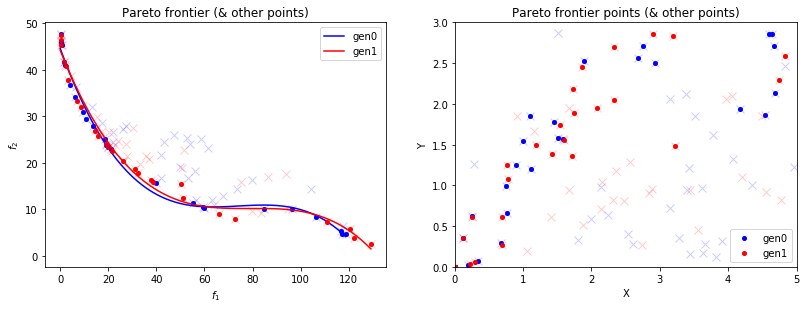

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((max(all_values[:,0])-min(all_values[:,0]))/10, (max(all_values[:,1])-min(all_values[:,1]))/10))
ax1.plot(paretoFront[0,:,0], paretoFront[0,:,1],'.',c='b', markersize=8)
ax1.plot(np.linspace(0,max(paretoFront[0,:,0]),141), fit0(np.linspace(0,max(paretoFront[0,:,0]),141)), c='b', label='gen0')
ax1.plot(paretoFront[1,:,0], paretoFront[1,:,1],'.',c='r', markersize=8)
ax1.plot(np.linspace(0,max(paretoFront[1,:,0]),200), fit1(np.linspace(0,max(paretoFront[1,:,0]),200)), c='r',label='gen1')
ax1.plot(funEval[0,:,0],funEval[0,:,1],'x',c='b', markersize=8, alpha=0.2)
ax1.plot(funEval[1,:,0],funEval[1,:,1],'x',c='r', markersize=8, alpha=0.2)
ax1.plot([0], [0], 's',c='white', markersize=8) #let's hide the zero matrix associated
ax1.set_xlabel('$f_1$')
ax1.set_ylabel('$f_2$')
ax1.set_title('Pareto frontier (& other points)')
ax1.legend()
ax2.plot(paretoFront[0,:,2], paretoFront[0,:,3],'.',c='b', markersize=8, label='gen0')
ax2.plot(paretoFront[1,:,2], paretoFront[1,:,3],'.',c='r', markersize=8, label='gen1')
ax2.plot(generation[0,:,0],generation[0,:,1],'x',c='b', markersize=8, alpha=0.2)
ax2.plot(generation[1,:,0],generation[1,:,1],'x',c='r', markersize=8, alpha=0.2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_xlim([x_low, x_high])
ax2.set_ylim([y_low, y_high])
ax2.set_title('Pareto frontier points (& other points)')
ax2.legend(loc='lower right')

## 3.3 Evolution of the generations
Once the generation zero has been computed - and it is more or less working - let's evolve the system for the specified number of generations with a function for some given inputs:

In [31]:
def GA_multiobjective(noGApoints, genLim, x_low, x_high, y_low, y_high):
    #Get the generation matrix and the initial setup with random points as before
    generation = np.zeros([genLim, noGApoints, 2])
    generation[0,:,0] = x_low+np.random.rand(noGApoints)*(x_high-x_low)
    generation[0,:,1] = y_low+np.random.rand(noGApoints)*(y_high-y_low)
    #Preallocation of other neccessary arrays
    paretoFront = np.zeros([genLim-1, noGApoints, funNo+2]) #Ideally a pareto front will have as many elements as points and the number of functions plus 2 coordinates
    funEval = np.zeros([genLim-1, noGApoints, funNo])
    fitness = np.zeros([genLim-1, noGApoints, 2]) #Simple probabilty and cummuative normalized probability

    for j in range(genLim-1):
        #while some values are out of bounds (i.e. constrained) they will be replaced to get only possible values
        while sum(constrainedPts(generation[j,:,:], const, constVal, compMode)) != 0:
            boolMat = constrainedPts(generation[j,:,:], const, constVal, compMode)
            nonValidPts = sum(boolMat)
            nonConstPts = np.zeros([nonValidPts, 2])
            nonConstPts[:,0] = x_low+np.random.rand(nonValidPts)*(x_high-x_low)
            nonConstPts[:,1] = y_low+np.random.rand(nonValidPts)*(y_high-y_low)
            generation[j, boolMat] = nonConstPts
        #function evaluation & Pareto front determination
        for i in range(funNo):
            funEval[j,:,i] = fun(generation[j,:,0], generation[j,:,1], i)
        paretoFront_temp = skyline(generation[j,:,:], funEval[j,:,:])
        paretoFront[j,0:paretoFront_temp.shape[0],:] = paretoFront_temp
        #selection, reproduction and mutation
        for i in range(noGApoints):
            dist = np.min(np.sqrt((funEval[j,i,0] - paretoFront_temp[:,0])**2+(funEval[j,i,1] - paretoFront_temp[:,1])**2))
            fitness[j,i,0] = np.min(dist)
        fitness[j,:,0] = 1-fitness[j,:,0]/np.max(fitness[j,:,0]) #simple probability
        fitness[j,:,1] = np.cumsum(fitness[j,:,0]/sum(fitness[j,:,0])) #cummulative probability
        for i in range(noGApoints):
            if fitness[j,i,0] == 1:
                generation[j+1,i,0] = generation[j,i,0]+generation[j,i,0]*np.random.normal(0.0,0.1)
                generation[j+1,i,1] = generation[j,i,1]+generation[j,i,1]*np.random.normal(0.0,0.1)
            else:
                dadPos = np.argmax(fitness[j,:,1]>np.random.rand())-1
                mumPos = np.argmax(fitness[j,:,1]>np.random.rand())-1
                while dadPos == mumPos:
                    dadPos = np.argmax(fitness[j,:,1]>np.random.rand())-1
                    mumPos = np.argmax(fitness[j,:,1]>np.random.rand())-1
                dad = generation[j,dadPos,:]
                mum = generation[j,mumPos,:]
                generation[j+1,i,0] = (dad[0]+mum[0])/2
                generation[j+1,i,1] = (dad[1]+mum[1])/2
                generation[j+1,i,0] = generation[j+1,i,0] + generation[j+1,i,0]*np.random.normal(0.0,0.1)
                generation[j+1,i,1] = generation[j+1,i,1] + generation[j+1,i,1]*np.random.normal(0.0,0.1)
    return generation, paretoFront, funEval, fitness

In [32]:
noGApoints = 40
genLim = 5
generation, paretoFront, funEval, fitness = GA_multiobjective(noGApoints, genLim, 0, 5, 0, 3)

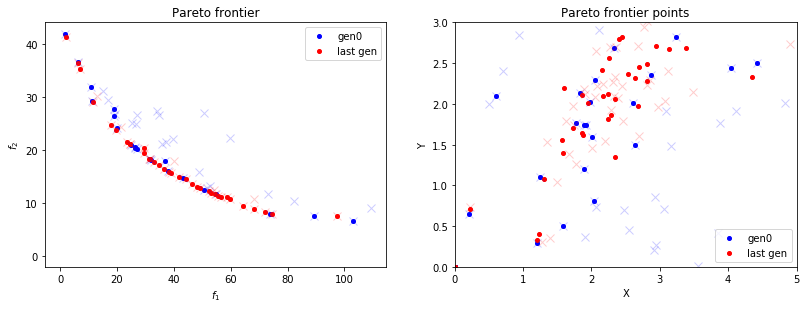

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((max(all_values[:,0])-min(all_values[:,0]))/10, (max(all_values[:,1])-min(all_values[:,1]))/10))
ax1.plot(paretoFront[0,:,0], paretoFront[0,:,1],'.',c='b', markersize=8, label='gen0')
ax1.plot(paretoFront[-1,:,0], paretoFront[-1,:,1],'.',c='r', markersize=8, label='last gen')
ax1.plot(funEval[0,:,0],funEval[0,:,1],'x',c='b', markersize=8, alpha=0.2)
ax1.plot(funEval[-1,:,0],funEval[-1,:,1],'x',c='r', markersize=8, alpha=0.2)
ax1.plot([0], [0], 's',c='white', markersize=8) #let's hide the zeros matrix associated
ax1.set_xlabel('$f_1$')
ax1.set_ylabel('$f_2$')
ax1.set_title('Pareto frontier')
ax1.legend()
ax2.plot(paretoFront[0,:,2], paretoFront[0,:,3],'.',c='b', markersize=8, label='gen0')
ax2.plot(paretoFront[-1,:,2], paretoFront[-1,:,3],'.',c='r', markersize=8, label='last gen')
ax2.plot(generation[0,:,0],generation[0,:,1],'x',c='b', markersize=8, alpha=0.2)
ax2.plot(generation[-1,:,0],generation[-1,:,1],'x',c='r', markersize=8, alpha=0.2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_xlim([x_low, x_high])
ax2.set_ylim([y_low, y_high])
ax2.set_title('Pareto frontier points')
ax2.legend(loc='lower right')

It can be seen that with less than half the evaluations needed for the Monte Carlo approach, the genetic algorithm method gives results accurate enough that follow the trend of the system that it is being analyzed.

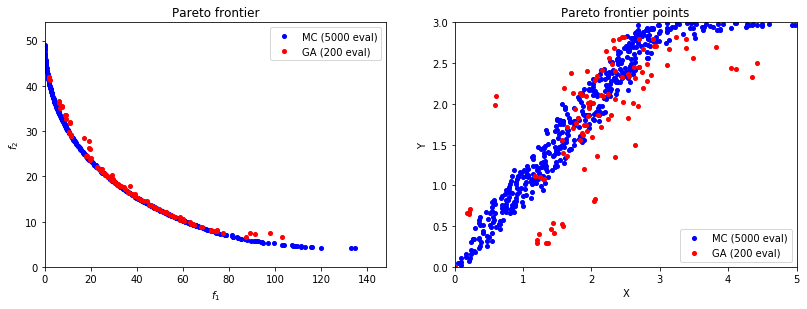

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((max(all_values[:,0])-min(all_values[:,0]))/10, (max(all_values[:,1])-min(all_values[:,1]))/10))
ax1.plot(PF[:,0], PF[:,1],'.',c='b', markersize=8, label='MC (%i eval)' %noPoints)
ax1.plot(paretoFront[-1,:,0], paretoFront[-1,:,1],'.',c='r', markersize=8, label='GA (%i eval)' %(noGApoints*genLim))
for i in range(paretoFront.shape[0]-1):
    ax1.plot(paretoFront[i,:,0], paretoFront[i,:,1],'.',c='r', markersize=8)
ax1.plot([0], [0], 's',c='white', markersize=8) #let's hide the zeros matrix associated
ax1.set_xlabel('$f_1$')
ax1.set_ylabel('$f_2$')
ax1.set_xlim([0, 1.1*max(all_values[:,0])])
ax1.set_ylim([0, 1.1*max(all_values[:,1])])
ax1.set_title('Pareto frontier')
ax1.legend()
ax2.plot(PF[:,2], PF[:,3],'.',c='b', markersize=8, label='MC (%i eval)' %noPoints)
ax2.plot(paretoFront[-1,:,2], paretoFront[-1,:,3],'.',c='r', markersize=8, label='GA (%i eval)' %(noGApoints*genLim))
for i in range(paretoFront.shape[0]-1):
    ax2.plot(paretoFront[i,:,2], paretoFront[i,:,3],'.',c='r', markersize=8) 
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_xlim([x_low, x_high])
ax2.set_ylim([y_low, y_high])
ax2.set_title('Pareto frontier points')
ax2.legend(loc='lower right')

# 4. Upgraded genetic algorithm: widening the range of the points
It can be seen that the vast majority of the points are located below $80$ while there is almost any point above $100$. In order to explore that zone and the other possible boundaries of the system the next method will be developed. One way of doing that can be inrementing the probability of an offspring to come from a parent with a higher $f_1$. The values of the first column of <tt> fitness </tt> will be divided in two ranges:
* $[0,1]$ for those points that don't belong to the Pareto front
* $[1,2]$ for the points in the Pareto front, having a greater number (i.e. more offspring possibilities) the values of higher $f_1$

In [35]:
def GA_expanded(noGApoints, genLim, x_low, x_high, y_low, y_high):
    #Get the generation matrix and the initial setup with random points as before
    generation = np.zeros([genLim, noGApoints, 2])
    generation[0,:,0] = x_low+np.random.rand(noGApoints)*(x_high-x_low)
    generation[0,:,1] = y_low+np.random.rand(noGApoints)*(y_high-y_low)
    #Preallocation of other neccessary arrays
    paretoFront = np.zeros([genLim-1, noGApoints, funNo+2]) #Ideally a pareto front will have as many elements as points and the number of functions plus 2 coordinates
    funEval = np.zeros([genLim-1, noGApoints, funNo])
    fitness = np.zeros([genLim-1, noGApoints, 2]) #Simple probabilty and cummuative normalized probability

    for j in range(genLim-1):
        #while some values are out of bounds (i.e. constrained) they will be replaced to get only possible values
        while sum(constrainedPts(generation[j,:,:], const, constVal, compMode)) != 0:
            boolMat = constrainedPts(generation[j,:,:], const, constVal, compMode)
            nonValidPts = sum(boolMat)
            nonConstPts = np.zeros([nonValidPts, 2])
            nonConstPts[:,0] = x_low+np.random.rand(nonValidPts)*(x_high-x_low)
            nonConstPts[:,1] = y_low+np.random.rand(nonValidPts)*(y_high-y_low)
            generation[j, boolMat] = nonConstPts
        #function evaluation & Pareto front determination
        for i in range(funNo):
            funEval[j,:,i] = fun(generation[j,:,0], generation[j,:,1], i)
        paretoFront_temp = skyline(generation[j,:,:], funEval[j,:,:])
        paretoFront[j,0:paretoFront_temp.shape[0],:] = paretoFront_temp
        #selection, reproduction and mutation
        for i in range(noGApoints):
            dist = np.min(np.sqrt((funEval[j,i,0] - paretoFront_temp[:,0])**2+(funEval[j,i,1] - paretoFront_temp[:,1])**2))
            fitness[j,i,0] = np.min(dist)
        fitness[j,:,0] = 1-fitness[j,:,0]/np.max(fitness[j,:,0]) #simple probability
        #let's include the ranges from [0,1] and [1,2]
        for i in range(noGApoints):
            if fitness[j,i,0] == 1:
                fitness[j,i,0] = 1 + funEval[j,i,0]/np.max(funEval[j,:,0])
        
        fitness[j,:,1] = np.cumsum(fitness[j,:,0]/sum(fitness[j,:,0])) #cummulative probability
        for i in range(noGApoints):
            if fitness[j,i,0] == 1:
                generation[j+1,i,0] = generation[j,i,0]+generation[j,i,0]*np.random.normal(0.0,0.1)
                generation[j+1,i,1] = generation[j,i,1]+generation[j,i,1]*np.random.normal(0.0,0.1)
            else:
                dadPos = np.argmax(fitness[j,:,1]>np.random.rand())-1
                mumPos = np.argmax(fitness[j,:,1]>np.random.rand())-1
                while dadPos == mumPos:
                    dadPos = np.argmax(fitness[j,:,1]>np.random.rand())-1
                    mumPos = np.argmax(fitness[j,:,1]>np.random.rand())-1
                dad = generation[j,dadPos,:]
                mum = generation[j,mumPos,:]
                generation[j+1,i,0] = (dad[0]+mum[0])/2
                generation[j+1,i,1] = (dad[1]+mum[1])/2
                generation[j+1,i,0] = generation[j+1,i,0] + generation[j+1,i,0]*np.random.normal(0.0,0.1)
                generation[j+1,i,1] = generation[j+1,i,1] + generation[j+1,i,1]*np.random.normal(0.0,0.1)
    return generation, paretoFront, funEval, fitness

In [36]:
noGApoints = 40
genLim = 5
generation, paretoFront, funEval, fitness = GA_expanded(noGApoints, genLim, 0, 5, 0, 3)

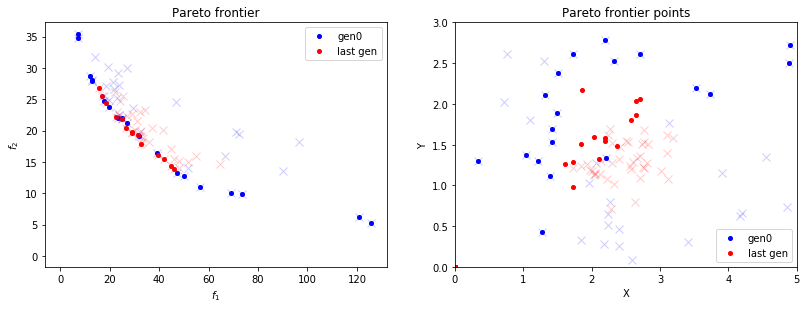

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((max(all_values[:,0])-min(all_values[:,0]))/10, (max(all_values[:,1])-min(all_values[:,1]))/10))
ax1.plot(paretoFront[0,:,0], paretoFront[0,:,1],'.',c='b', markersize=8, label='gen0')
ax1.plot(paretoFront[-1,:,0], paretoFront[-1,:,1],'.',c='r', markersize=8, label='last gen')
ax1.plot(funEval[0,:,0],funEval[0,:,1],'x',c='b', markersize=8, alpha=0.2)
ax1.plot(funEval[-1,:,0],funEval[-1,:,1],'x',c='r', markersize=8, alpha=0.2)
ax1.plot([0], [0], 's',c='white', markersize=8) #let's hide the zeros matrix associated
ax1.set_xlabel('$f_1$')
ax1.set_ylabel('$f_2$')
ax1.set_title('Pareto frontier')
ax1.legend()
ax2.plot(paretoFront[0,:,2], paretoFront[0,:,3],'.',c='b', markersize=8, label='gen0')
ax2.plot(paretoFront[-1,:,2], paretoFront[-1,:,3],'.',c='r', markersize=8, label='last gen')
ax2.plot(generation[0,:,0],generation[0,:,1],'x',c='b', markersize=8, alpha=0.2)
ax2.plot(generation[-1,:,0],generation[-1,:,1],'x',c='r', markersize=8, alpha=0.2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_xlim([x_low, x_high])
ax2.set_ylim([y_low, y_high])
ax2.set_title('Pareto frontier points')
ax2.legend(loc='lower right')